In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

import seaborn as sns
import math
from matplotlib.figure import Figure



pd.set_option('display.max_colwidth',None)


In [2]:
file=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', 
                   sheet_name='Data')

## just learned that you can add the sheet name in 

In [3]:
file

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
details=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx')
                   

In [5]:
details

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,Data Description:,NaN
5,NaN,NaN,NaN
6,NaN,ID,Customer ID
7,NaN,Age,Customer's age in completed years
8,NaN,Experience,#years of professional experience
9,NaN,Income,Annual income of the customer ($000)


In [6]:
file


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [7]:
file.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
file.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
file

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [11]:
file.Family.unique()

array([4, 3, 1, 2], dtype=int64)

In [12]:
file.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [13]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import math 
from matplotlib.figure import Figure
pd.set_option('display.max_colwidth', None)



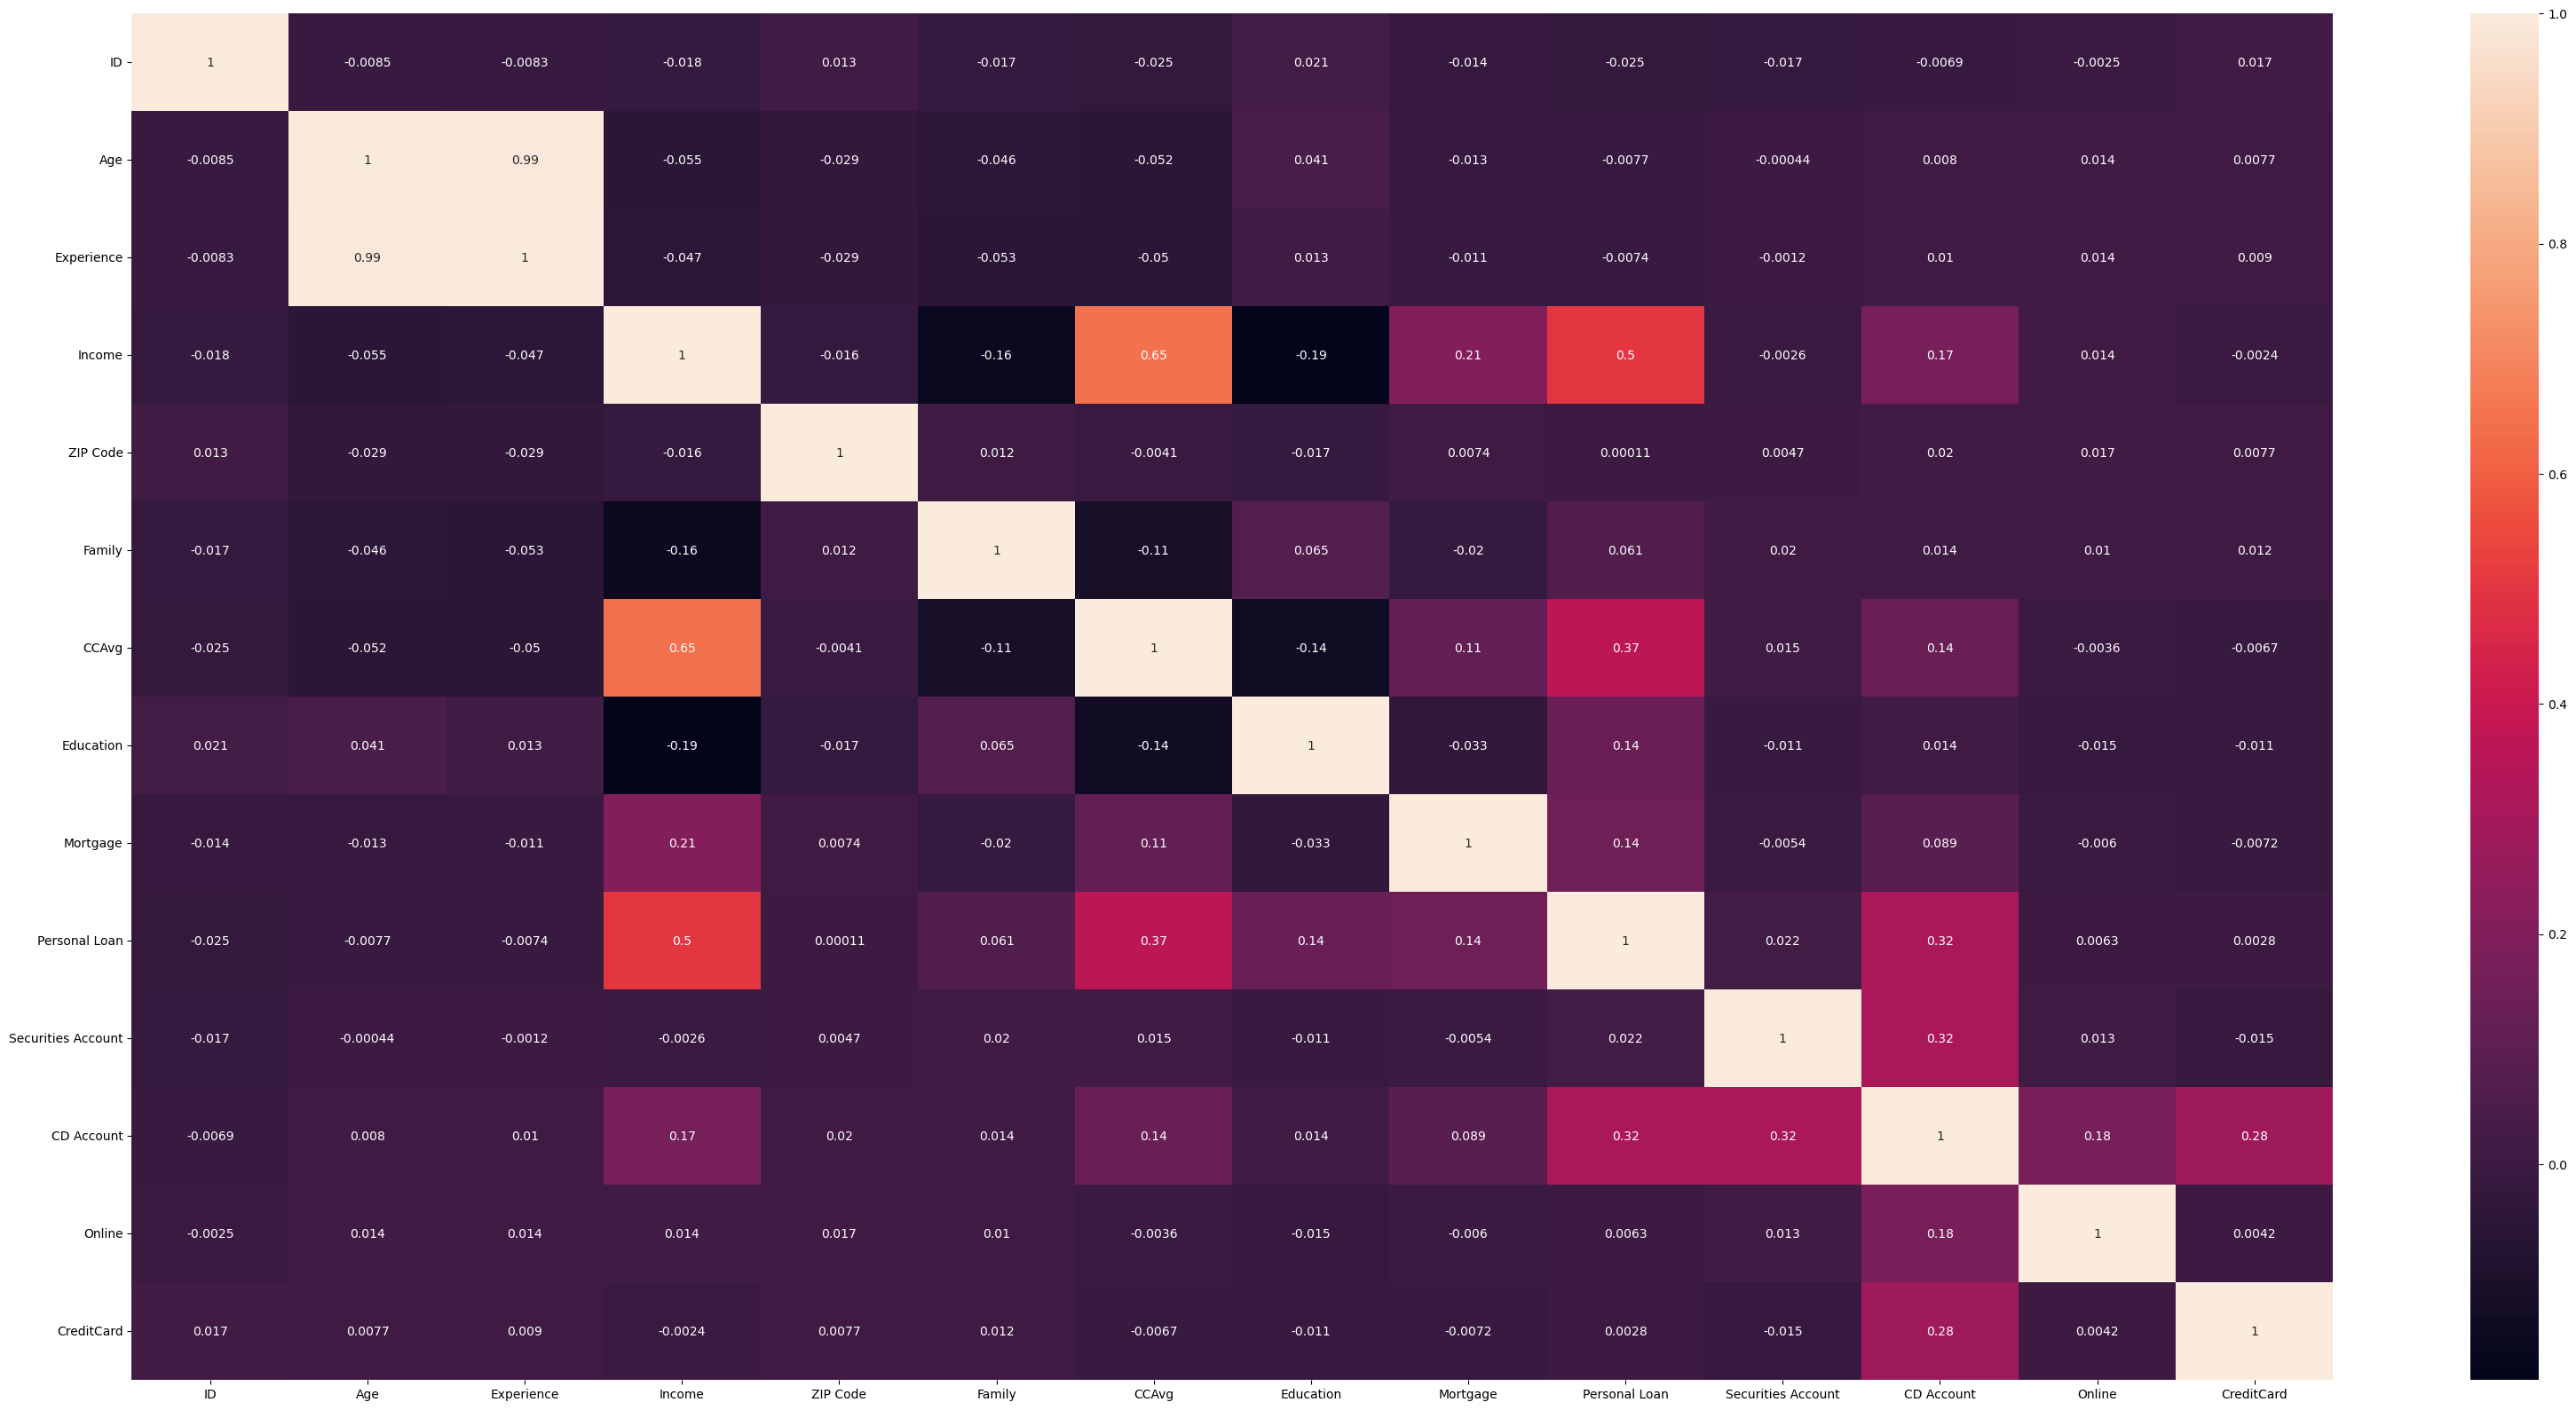

In [14]:
plt.figure(figsize=(40,20))
sns.heatmap(file.corr(), annot=True)
plt.show()

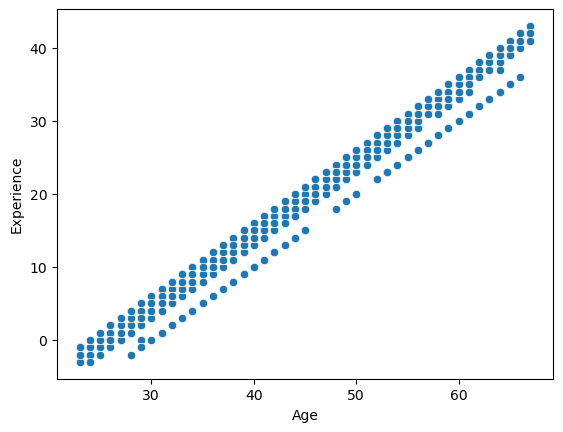

In [15]:
sns.scatterplot(data=file, x='Age', y='Experience')
plt.show()

In [16]:
file=file.drop('Experience', axis=1)


In [17]:
file

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,49,90034,3,0.5,2,0,0,0,0,1,0


In [18]:
## here we are dropping the ID column because the customer ID tells us 
## nothing when referring to the probability of personal loan Y/N

file=file.drop('ID',axis=1)

In [19]:
file

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


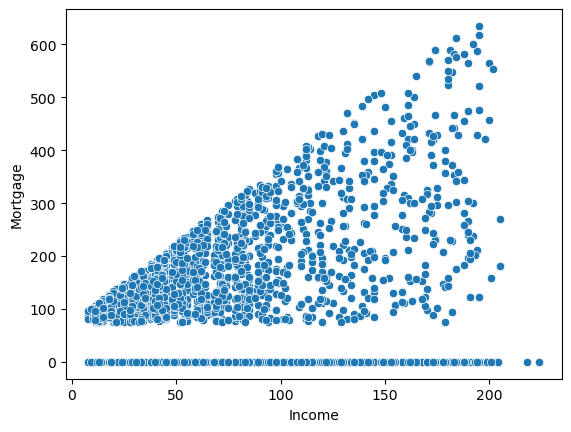

In [20]:
sns.scatterplot(data=file, x='Income', y='Mortgage')

plt.show()

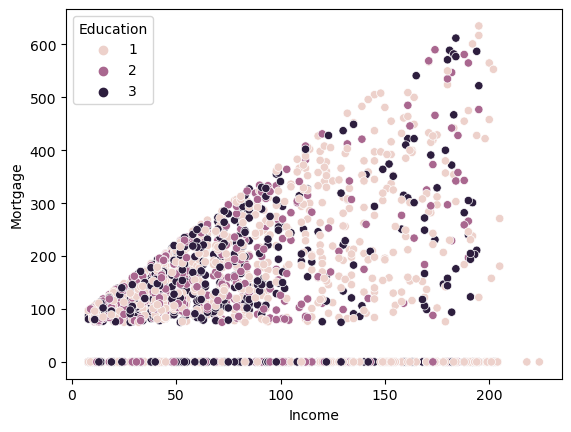

In [21]:
sns.scatterplot(data=file, x='Income', y='Mortgage', hue='Education')

plt.show()

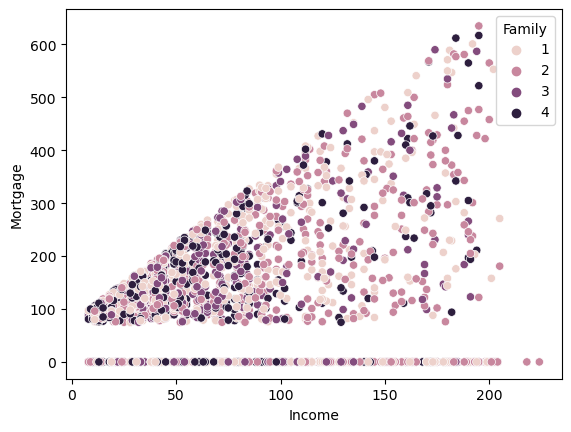

In [22]:
sns.scatterplot(data=file, x='Income', y='Mortgage', hue='Family')

plt.show()

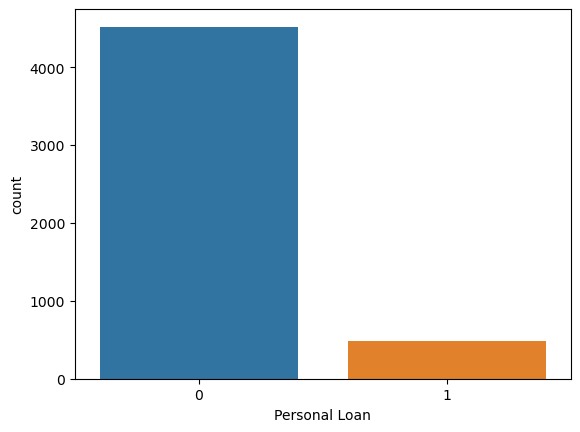

In [23]:
sns.countplot(x='Personal Loan', data=file)
plt.show()

# Class Imbalance 
## Sampling 

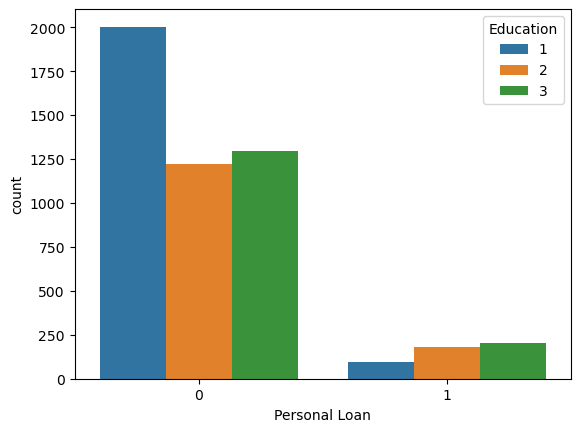

In [24]:
# how does education play a role in liklihood of customer getting 
# personal loan?

sns.countplot(x="Personal Loan", hue='Education', data=file)
plt.show()

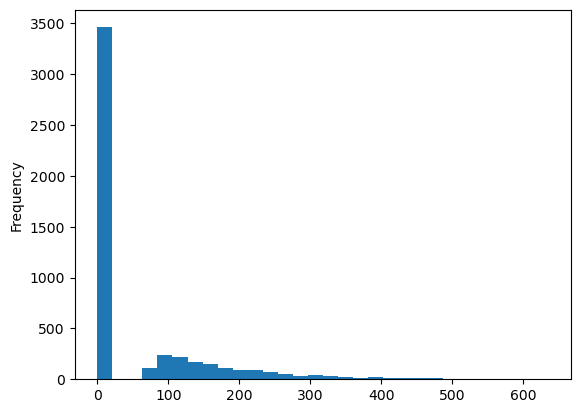

In [25]:
file['Mortgage'].plot.hist(bins=30)
plt.show()

In [26]:
# conditional statement for Y/N mortgage
file['MortYN']='N'
file.loc[file['Mortgage']>0,'MortYN']='Y'

In [27]:
file

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,MortYN
0,25,49,91107,4,1.6,1,0,0,1,0,0,0,N
1,45,34,90089,3,1.5,1,0,0,1,0,0,0,N
2,39,11,94720,1,1.0,1,0,0,0,0,0,0,N
3,35,100,94112,1,2.7,2,0,0,0,0,0,0,N
4,35,45,91330,4,1.0,2,0,0,0,0,0,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0,N
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0,Y
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0,N
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0,N


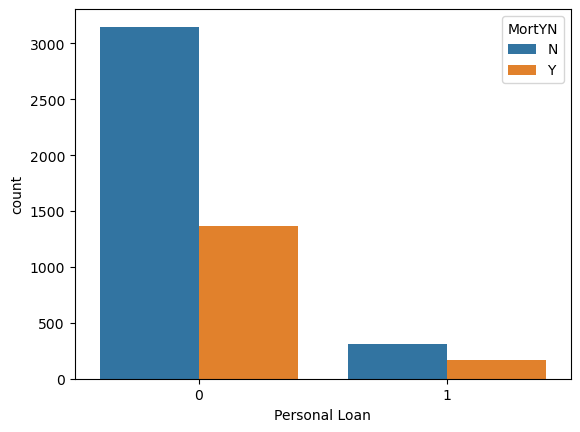

In [28]:
sns.countplot(x="Personal Loan", hue='MortYN', data=file)
plt.show()

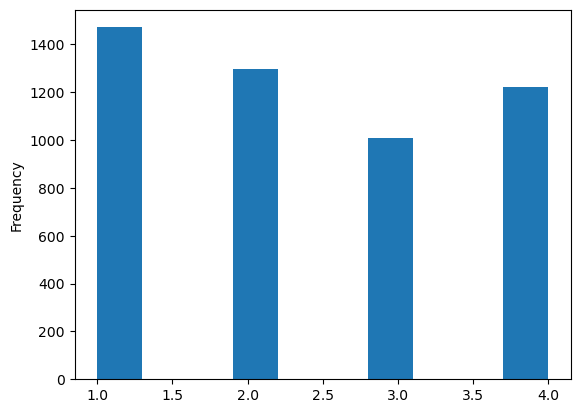

In [29]:
file['Family'].plot.hist(bins=10)
plt.show()

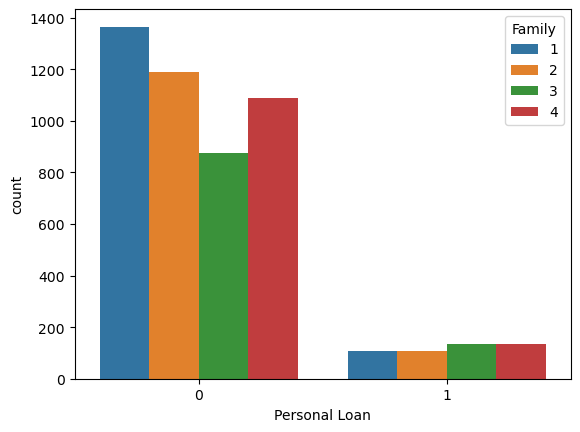

In [30]:
sns.countplot(x="Personal Loan", hue='Family', data=file)
plt.show()

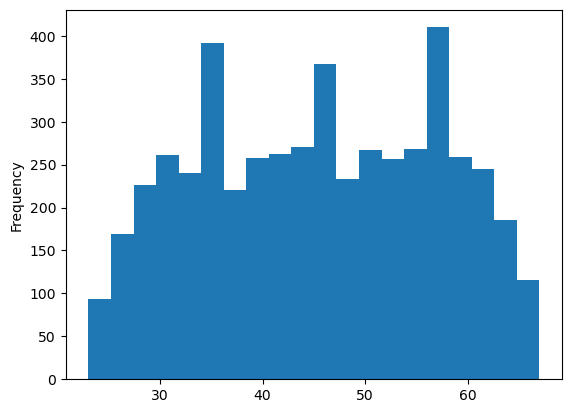

In [31]:
file['Age'].plot.hist(bins=20)
plt.show()

In [32]:
y=file['Personal Loan']

In [33]:
X=file.drop('Personal Loan', axis='columns')

In [34]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [35]:
X

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,MortYN
0,25,49,91107,4,1.6,1,0,1,0,0,0,N
1,45,34,90089,3,1.5,1,0,1,0,0,0,N
2,39,11,94720,1,1.0,1,0,0,0,0,0,N
3,35,100,94112,1,2.7,2,0,0,0,0,0,N
4,35,45,91330,4,1.0,2,0,0,0,0,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,1,0,N
4996,30,15,92037,4,0.4,1,85,0,0,1,0,Y
4997,63,24,93023,2,0.3,3,0,0,0,0,0,N
4998,65,49,90034,3,0.5,2,0,0,0,1,0,N


In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

!pip install category_encoders
%matplotlib inline

# Supervised Machine Learning Problem

In [37]:
### test and train split
### training set of about 80% of your data and then after you've used
### 80% to train, you will test the model that you just created 
### and see what the accuracy is 


In [38]:
X=X.drop('MortYN', axis='columns')

## please look into how to use encoding for machine learning - this takes non numerical
## (but useful) data and converts it into new columns-usualy with 0 and 1 values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                   random_state=2)

In [40]:
print(X_train.shape, y_train.shape)

(4000, 11) (4000,)


In [41]:
## look into the various solvers that can 
## be used in logistic regression

logmodel=LogisticRegression(solver='newton-cg', max_iter=10000)

In [42]:
## look into fitting a model 
logmodel.fit(X_train, y_train)

C:\Users\nasmo\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nasmo\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nasmo\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nasmo\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nasmo\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The 

LogisticRegression(max_iter=10000, solver='newton-cg')

In [43]:
## look into prediction - predict
predictions=logmodel.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.945

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[894,  15],
       [ 40,  51]], dtype=int64)

In [46]:
### LOOK INTO CONFUSION MATRIX 

# Precision
# Recall score
# Overfitting- pretty prevelant class imbalance
## introduce sampling strategies

# how can i tune my model or data to improve recall? Precision


In [47]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [48]:

recall_score(y_test,predictions)


0.5604395604395604

In [49]:
precision_score(y_test,predictions)

0.7727272727272727

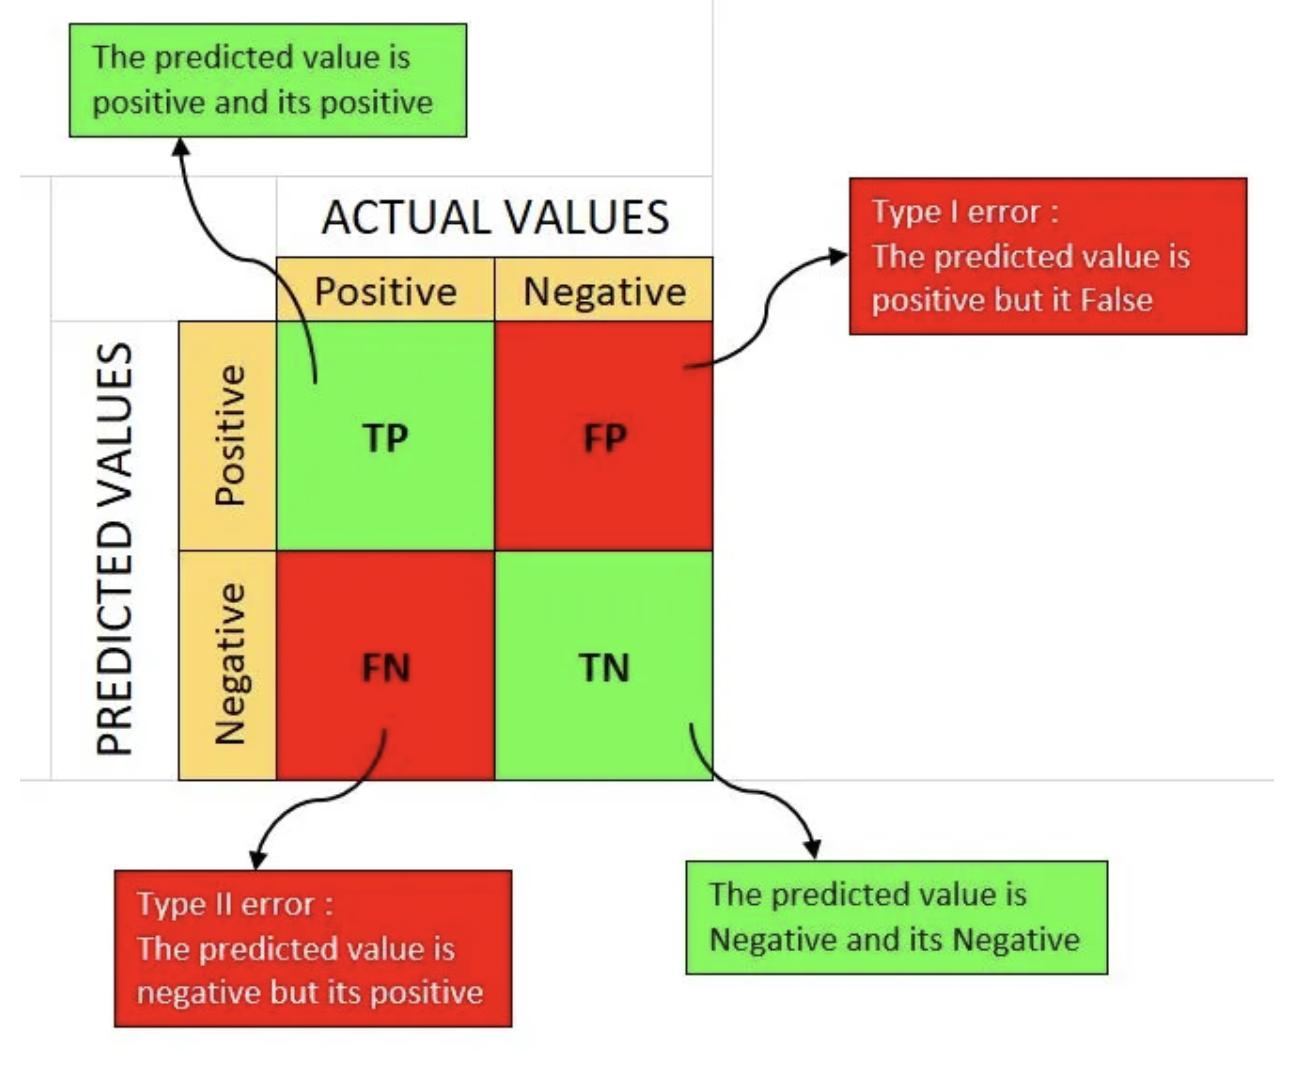

In [50]:
## hyper parameter tuning

In [51]:
file['Fam1']=0
file.loc[file['Family']==1, 'Fam1']=1

In [52]:
file['Fam2']=0
file.loc[file['Family']==2, 'Fam2']=1

file['Fam3']=0
file.loc[file['Family']==3, 'Fam3']=1

file['Fam4']=0
file.loc[file['Family']==4, 'Fam4']=1


### making new columns to represent categorical data as binary data now. 

##. this improves model accuracy, precision, and recall 
## because model can interpret data better


In [53]:
file

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,MortYN,Fam1,Fam2,Fam3,Fam4
0,25,49,91107,4,1.6,1,0,0,1,0,0,0,N,0,0,0,1
1,45,34,90089,3,1.5,1,0,0,1,0,0,0,N,0,0,1,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0,N,1,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0,N,1,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1,N,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0,N,1,0,0,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0,Y,0,0,0,1
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0,N,0,1,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0,N,0,0,1,0


In [54]:
file=file.drop('Family', axis='columns')

In [55]:
file=file.drop('MortYN', axis='columns')

In [56]:
file


,Age,Income,ZIP Code,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Fam1,Fam2,Fam3,Fam4
0,25,49,91107,1.6,1,0,0,1,0,0,0,0,0,0,1
1,45,34,90089,1.5,1,0,0,1,0,0,0,0,0,1,0
2,39,11,94720,1.0,1,0,0,0,0,0,0,1,0,0,0
3,35,100,94112,2.7,2,0,0,0,0,0,0,1,0,0,0
4,35,45,91330,1.0,2,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1.9,3,0,0,0,0,1,0,1,0,0,0
4996,30,15,92037,0.4,1,85,0,0,0,1,0,0,0,0,1
4997,63,24,93023,0.3,3,0,0,0,0,0,0,0,1,0,0
4998,65,49,90034,0.5,2,0,0,0,0,1,0,0,0,1,0


In [57]:
y=file['Personal Loan']

In [58]:
X=file.drop('Personal Loan', axis=1)


In [59]:

X

,Age,Income,ZIP Code,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Fam1,Fam2,Fam3,Fam4
0,25,49,91107,1.6,1,0,1,0,0,0,0,0,0,1
1,45,34,90089,1.5,1,0,1,0,0,0,0,0,1,0
2,39,11,94720,1.0,1,0,0,0,0,0,1,0,0,0
3,35,100,94112,2.7,2,0,0,0,0,0,1,0,0,0
4,35,45,91330,1.0,2,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1.9,3,0,0,0,1,0,1,0,0,0
4996,30,15,92037,0.4,1,85,0,0,1,0,0,0,0,1
4997,63,24,93023,0.3,3,0,0,0,0,0,0,1,0,0
4998,65,49,90034,0.5,2,0,0,0,1,0,0,0,1,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                   random_state=2)

In [61]:
logmodel=LogisticRegression(solver='newton-cg', max_iter=10000)

In [62]:
logmodel.fit(X_train, y_train)

C:\Users\nasmo\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nasmo\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nasmo\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nasmo\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nasmo\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The 

LogisticRegression(max_iter=10000, solver='newton-cg')

In [63]:
predictions=logmodel.predict(X_test)

In [64]:
accuracy_score(y_test,predictions)


0.948

In [65]:
recall_score(y_test,predictions)

#false negative


0.5714285714285714

In [66]:
precision_score(y_test,predictions)

#limited false positive

0.8

In [67]:
file

file['Edu1']=0
file.loc[file['Education']==1, 'Edu1']=1

file['Edu2']=0
file.loc[file['Education']==2, 'Edu2']=1

file['Edu3']=0
file.loc[file['Education']==3, 'Edu3']=1

In [68]:
file

,Age,Income,ZIP Code,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Fam1,Fam2,Fam3,Fam4,Edu1,Edu2,Edu3
0,25,49,91107,1.6,1,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,34,90089,1.5,1,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,11,94720,1.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,100,94112,2.7,2,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,45,91330,1.0,2,0,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1.9,3,0,0,0,0,1,0,1,0,0,0,0,0,1
4996,30,15,92037,0.4,1,85,0,0,0,1,0,0,0,0,1,1,0,0
4997,63,24,93023,0.3,3,0,0,0,0,0,0,0,1,0,0,0,0,1
4998,65,49,90034,0.5,2,0,0,0,0,1,0,0,0,1,0,0,1,0


In [69]:
file=file.drop('Education', axis=1)

In [70]:
file

,Age,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Fam1,Fam2,Fam3,Fam4,Edu1,Edu2,Edu3
0,25,49,91107,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,34,90089,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,11,94720,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,100,94112,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,45,91330,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1.9,0,0,0,0,1,0,1,0,0,0,0,0,1
4996,30,15,92037,0.4,85,0,0,0,1,0,0,0,0,1,1,0,0
4997,63,24,93023,0.3,0,0,0,0,0,0,0,1,0,0,0,0,1
4998,65,49,90034,0.5,0,0,0,0,1,0,0,0,1,0,0,1,0


In [71]:
y=file['Personal Loan']

In [72]:
X=file.drop('Personal Loan', axis=1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                   random_state=2)

In [74]:
logmodel=LogisticRegression(solver='newton-cg', max_iter=10000)

In [75]:
logmodel.fit(X_train, y_train)

C:\Users\nasmo\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nasmo\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nasmo\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nasmo\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\nasmo\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The 

LogisticRegression(max_iter=10000, solver='newton-cg')

In [76]:
predictions=logmodel.predict(X_test)

In [77]:
accuracy_score(y_test,predictions)

0.953

In [78]:
recall_score(y_test,predictions)

0.5934065934065934

In [79]:
precision_score(y_test,predictions)

0.84375

# Another classification model:
    
# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100, 
                                  oob_score=True, random_state=42)

In [81]:
RF_model.fit(X_train,y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [82]:
predictions=RF_model.predict(X_test)

In [83]:
accuracy_score(y_test, predictions)

0.984

In [84]:
recall_score(y_test,predictions)

0.8571428571428571

In [85]:
precision_score(y_test,predictions)

0.9629629629629629

In [86]:
file

,Age,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Fam1,Fam2,Fam3,Fam4,Edu1,Edu2,Edu3
0,25,49,91107,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,34,90089,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,11,94720,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,100,94112,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,45,91330,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1.9,0,0,0,0,1,0,1,0,0,0,0,0,1
4996,30,15,92037,0.4,85,0,0,0,1,0,0,0,0,1,1,0,0
4997,63,24,93023,0.3,0,0,0,0,0,0,0,1,0,0,0,0,1
4998,65,49,90034,0.5,0,0,0,0,1,0,0,0,1,0,0,1,0


In [87]:
y_hats = RF_model.predict_proba(X)

y_hats = np.delete(y_hats, 0, axis=1)
y_hats

y_hats_df = pd.DataFrame(data = y_hats, columns = ['Model Prediction Probability'], index = X.index.copy())
df_out1 = pd.merge(X, y, how = 'left', left_index = True, right_index = True)
df_out = pd.merge(df_out1, y_hats_df, how = 'left', left_index = True, right_index = True)

In [88]:
df_out=df_out.round({'Model Prediction Probability': 4})

In [89]:
df_out

,Age,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Fam1,Fam2,Fam3,Fam4,Edu1,Edu2,Edu3,Personal Loan,Model Prediction Probability
0,25,49,91107,1.6,0,1,0,0,0,0,0,0,1,1,0,0,0,0.0
1,45,34,90089,1.5,0,1,0,0,0,0,0,1,0,1,0,0,0,0.0
2,39,11,94720,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.0
3,35,100,94112,2.7,0,0,0,0,0,1,0,0,0,0,1,0,0,0.0
4,35,45,91330,1.0,0,0,0,0,1,0,0,0,1,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1.9,0,0,0,1,0,1,0,0,0,0,0,1,0,0.0
4996,30,15,92037,0.4,85,0,0,1,0,0,0,0,1,1,0,0,0,0.0
4997,63,24,93023,0.3,0,0,0,0,0,0,1,0,0,0,0,1,0,0.0
4998,65,49,90034,0.5,0,0,0,1,0,0,0,1,0,0,1,0,0,0.0


In [90]:
sub_1=df_out[df_out['Personal Loan']==1]

In [91]:
sub_1=sub_1[sub_1['Model Prediction Probability']<0.5]

In [92]:
sub_1.head(50)

,Age,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Fam1,Fam2,Fam3,Fam4,Edu1,Edu2,Edu3,Personal Loan,Model Prediction Probability
322,63,101,92007,3.9,0,1,1,1,0,1,0,0,0,1,0,0,1,0.41
464,43,83,94305,3.6,0,0,0,0,1,0,0,0,1,0,0,1,1,0.14
505,36,69,94305,3.1,0,0,0,1,0,0,0,1,0,0,1,0,1,0.19
1062,47,83,92220,3.8,97,0,0,0,0,1,0,0,0,1,0,0,1,0.05
1069,44,75,91203,3.5,0,0,0,1,0,0,1,0,0,1,0,0,1,0.03
1176,29,103,90049,3.4,0,0,0,1,0,0,0,0,1,1,0,0,1,0.36
1177,28,71,90405,3.3,149,1,1,1,0,1,0,0,0,0,1,0,1,0.47
2136,50,115,95008,1.2,0,0,0,0,1,1,0,0,0,0,0,1,1,0.46
2544,58,90,95039,3.6,0,0,0,0,0,1,0,0,0,0,1,0,1,0.26
3988,59,85,91330,3.4,0,0,1,0,1,1,0,0,0,0,0,1,1,0.38


In [93]:
importances = RF_model.feature_importances_

In [94]:
RF_model.feature_importances_

array([0.03633439, 0.35220867, 0.0303585 , 0.14666238, 0.0298206 ,
       0.00369308, 0.04440543, 0.00679053, 0.00763972, 0.01753025,
       0.01950083, 0.04029871, 0.03819836, 0.13384614, 0.04388207,
       0.04883034])

<AxesSubplot:>

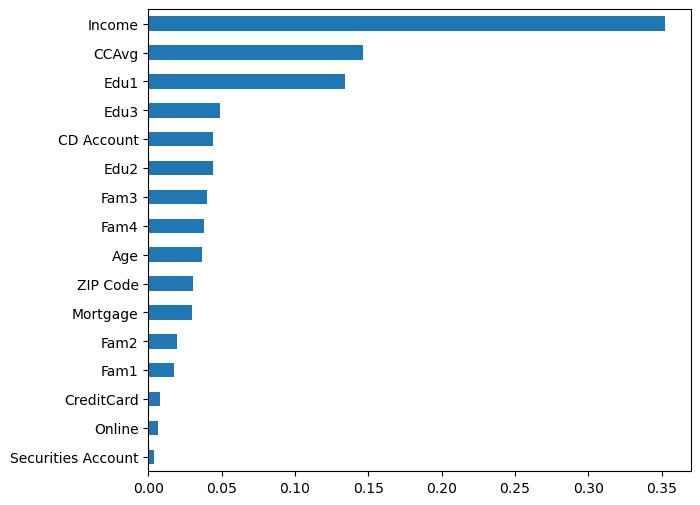

In [95]:
feature_importances = pd.Series(RF_model.feature_importances_, index=X_train.columns)
sorted_features=feature_importances.sort_values()
#feature_importances.plot(kind='barh', figsize=(7,6))
sorted_features.plot(kind='barh', figsize=(7,6))

In [96]:
from sklearn.inspection import plot_partial_dependence

C:\Users\nasmo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


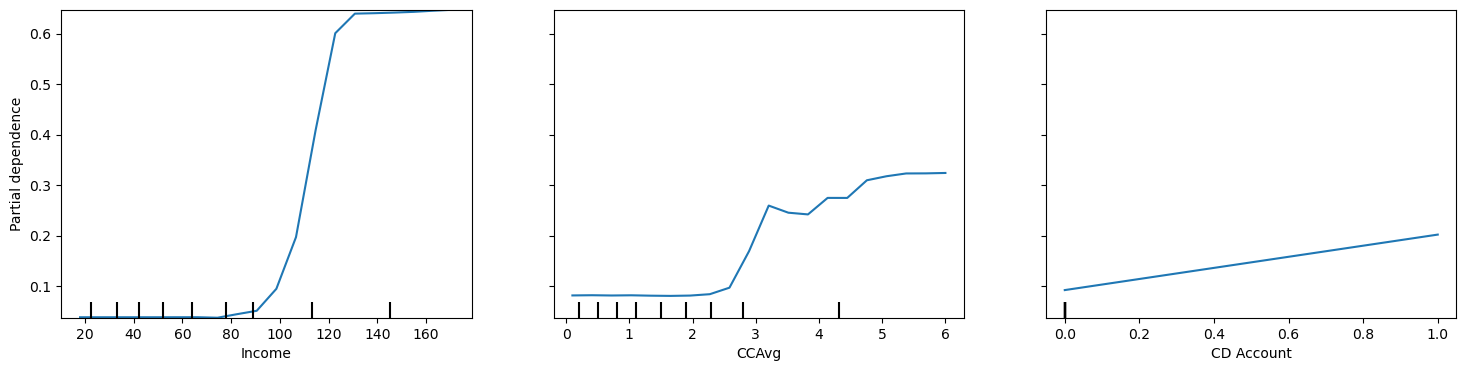

In [97]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train, ['Income', "CCAvg", "CD Account"], 
                        grid_resolution=20, ax=ax)

C:\Users\nasmo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


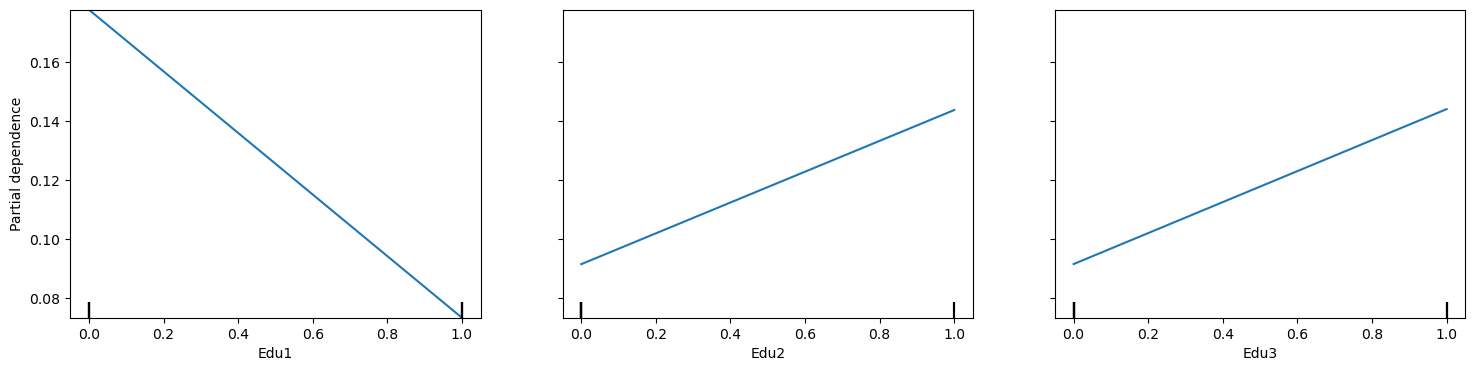

In [98]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train, ['Edu1', "Edu2", "Edu3"], 
                        grid_resolution=20, ax=ax)

https://jamesmccaffrey.wordpress.com/2010/08/09/precision-recall-type-i-error-type-ii-error-true-positive-and-false-positive-and-roc-curves/

https://www.google.com/search?q=recall+and+precision+statement&oq=recall+and+precision+statement+&aqs=chrome..69i57j33i160l2.4932j0j7&sourceid=chrome&ie=UTF-8

# Discriptive Ststistics
### In this cell we will store some 

In [99]:
file

,Age,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Fam1,Fam2,Fam3,Fam4,Edu1,Edu2,Edu3
0,25,49,91107,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,34,90089,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,11,94720,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,100,94112,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,45,91330,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1.9,0,0,0,0,1,0,1,0,0,0,0,0,1
4996,30,15,92037,0.4,85,0,0,0,1,0,0,0,0,1,1,0,0
4997,63,24,93023,0.3,0,0,0,0,0,0,0,1,0,0,0,0,1
4998,65,49,90034,0.5,0,0,0,0,1,0,0,0,1,0,0,1,0


In [100]:
## creating a dataframe where the personal loan column ==1
loan_yes=file[file['Personal Loan']==1]

In [101]:
## creating a dataframe where the personal loan column ==0
loan_no=file[file['Personal Loan']==0]

In [102]:
average_income_yes=loan_yes['Income'].mean()
average_income_yes

144.74583333333334

In [103]:
average_income_no=loan_no['Income'].mean()
average_income_no

66.23738938053097

In [104]:
average_income_yes=round(loan_yes['Income'].mean(),2)
average_income_yes

144.75

In [105]:
average_income_no=round(loan_no['Income'].mean(),2)
average_income_no

66.24

## Let's talk probability

In [110]:
over_110=file[file['Income']>=110]

In [107]:
#over_110

In [111]:
over_length=len(over_110)
# this is using the built in len function len() which will give you the number of data rows in a df

In [112]:
over_length

1080

In [113]:
over_110_yes=over_110['Personal Loan'].value_counts()[1]

In [114]:
over_110_yes

414

In [ ]:
fig,axes=plt.subplots()
sns.violinplot['Personal Loan','Income']